#### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing the data**

In [3]:
client_appl = pd.read_csv("application_data.csv")
prev_loan = pd.read_csv("previous_application.csv")

### for application_data

In [4]:
# checking the shape and info about the data
client_appl.shape   # 307511 rows and 122 columns

(307511, 122)

In [5]:
# there are 122 columns so that full columns will not be visible so applying
pd.set_option("display.max_columns",150)

In [6]:
pd.set_option("display.max_rows",150)

In [7]:
# checking the data is having duplicated rows or not
client_appl.duplicated().sum()  # there is no duplicate data

0

In [8]:
client_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# all the info about each column is not showing so
client_appl.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

**Data Cleaning**

In [10]:
# checking % of null values in each column
null_appl = pd.DataFrame(client_appl.isnull().mean()*100)

In [11]:
null_appl.head()

,0
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0


In [12]:
null_appl.reset_index(inplace=True)

In [13]:
null_appl.sort_values(0, ascending=False, inplace=True)

In [14]:
null_appl

,index,0
76,COMMONAREA_MEDI,69.872297
48,COMMONAREA_AVG,69.872297
62,COMMONAREA_MODE,69.872297
70,NONLIVINGAPARTMENTS_MODE,69.432963
56,NONLIVINGAPARTMENTS_AVG,69.432963
84,NONLIVINGAPARTMENTS_MEDI,69.432963
86,FONDKAPREMONT_MODE,68.386172
68,LIVINGAPARTMENTS_MODE,68.354953
54,LIVINGAPARTMENTS_AVG,68.354953
82,LIVINGAPARTMENTS_MEDI,68.354953


In [15]:
# there are so many columns with % of null values
# dropping the columns with more than 45% null values
max_null_appl = null_appl[null_appl[0] > 45]["index"]

In [16]:
max_null_appl.shape[0]  # there are 49 columns to drop

49

In [17]:
max_null_appl_list = list(max_null_appl)

In [18]:
client_appl.drop(max_null_appl_list, axis=1, inplace=True)

In [19]:
# after dropping the checking shape of data
client_appl.shape   # there are 73 columns

(307511, 73)

In [20]:
remain_null_col = null_appl[(null_appl[0] < 45) & (null_appl[0] > 0)]

In [21]:
remain_null_col

,index,0
28,OCCUPATION_TYPE,31.345545
43,EXT_SOURCE_3,19.825307
116,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
121,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
11,NAME_TYPE_SUITE,0.420148
91,OBS_30_CNT_SOCIAL_CIRCLE,0.332021


**Imputation of null values**

In [22]:
client_appl["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
# column is categorical so filling the null values with mode but the mode
# of the column is Laborers so we are not filling it with that
# so filling the null values with "Unknown"
client_appl["OCCUPATION_TYPE"] = client_appl["OCCUPATION_TYPE"].fillna("Unknown")

In [24]:
client_appl["EXT_SOURCE_3"].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [25]:
# this columns is numerical so decide with mean and median
client_appl["EXT_SOURCE_3"].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [26]:
# filling the null values with median
client_appl["EXT_SOURCE_3"] = client_appl["EXT_SOURCE_3"].fillna(0.535276)

In [27]:
client_appl["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [28]:
# it is numerical so checking mean and median
client_appl["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [29]:
# imputing with median
client_appl["AMT_REQ_CREDIT_BUREAU_HOUR"] = client_appl["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0.0)

In [30]:
# there are 5 more column just like that so doing same step
client_appl["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [31]:
client_appl["AMT_REQ_CREDIT_BUREAU_DAY"] = client_appl["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0.0)

In [32]:
client_appl["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [33]:
client_appl["AMT_REQ_CREDIT_BUREAU_WEEK"] = client_appl["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0.0)

In [34]:
client_appl["AMT_REQ_CREDIT_BUREAU_MON"].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [35]:
client_appl["AMT_REQ_CREDIT_BUREAU_MON"] = client_appl["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0.0)

In [36]:
client_appl["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [37]:
client_appl["AMT_REQ_CREDIT_BUREAU_QRT"] = client_appl["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0.0)

In [38]:
client_appl["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [39]:
client_appl["AMT_REQ_CREDIT_BUREAU_YEAR"] = client_appl["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1.0)

In [40]:
client_appl["NAME_TYPE_SUITE"].value_counts()  # Categorical

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [41]:
# filling null values with mode
client_appl["NAME_TYPE_SUITE"] = client_appl["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [42]:
client_appl["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts() #numerical           

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [43]:
client_appl["OBS_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [44]:
# filling null values with median
client_appl["OBS_30_CNT_SOCIAL_CIRCLE"] = client_appl["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0.0)

In [45]:
# there are 3 more columns just like above so doing same steps
client_appl["DEF_30_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [46]:
client_appl["DEF_30_CNT_SOCIAL_CIRCLE"] = client_appl["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.0)

In [47]:
client_appl["OBS_60_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [48]:
client_appl["OBS_60_CNT_SOCIAL_CIRCLE"] = client_appl["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0.0)

In [49]:
client_appl["DEF_60_CNT_SOCIAL_CIRCLE"].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [50]:
client_appl["DEF_60_CNT_SOCIAL_CIRCLE"] = client_appl["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.0)

In [51]:
client_appl["EXT_SOURCE_2"].value_counts()  # numerical

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [52]:
client_appl["EXT_SOURCE_2"].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [53]:
# it is not in the format so
client_appl["EXT_SOURCE_2"].median()

0.5659614260608526

In [54]:
client_appl["EXT_SOURCE_2"] = client_appl["EXT_SOURCE_2"].fillna(0.566)

In [55]:
client_appl["AMT_GOODS_PRICE"].value_counts()  # numerical             

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [56]:
client_appl["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [57]:
client_appl["AMT_GOODS_PRICE"].median()

450000.0

In [58]:
client_appl["AMT_GOODS_PRICE"] = client_appl["AMT_GOODS_PRICE"].fillna(450000.0)

In [59]:
client_appl["AMT_ANNUITY"].value_counts()  # numerical            

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [60]:
client_appl["AMT_ANNUITY"].median()

24903.0

In [61]:
client_appl["AMT_ANNUITY"] = client_appl["AMT_ANNUITY"].fillna(24903.0)

In [62]:
client_appl["CNT_FAM_MEMBERS"].value_counts()  # numerical     

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [63]:
client_appl["CNT_FAM_MEMBERS"].median()

2.0

In [64]:
client_appl["CNT_FAM_MEMBERS"] = client_appl["CNT_FAM_MEMBERS"].fillna(2.0)

In [65]:
client_appl["DAYS_LAST_PHONE_CHANGE"].value_counts()       

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [66]:
client_appl["DAYS_LAST_PHONE_CHANGE"].median()

-757.0

In [67]:
client_appl["DAYS_LAST_PHONE_CHANGE"] = client_appl["DAYS_LAST_PHONE_CHANGE"].fillna(-757.0)

In [68]:
# So all the imputation part is finished so checking count of null values
client_appl.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

**Checking for data type errors and errors in values in catgorical column**

In [69]:
client_appl.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [70]:
client_appl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# for categorical type
categ = []
numer = []
for i in client_appl.columns:
    if client_appl[i].dtype=='object':
        categ.append(i)
    else:
        numer.append(i)

In [72]:
categ

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [73]:
client_appl["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [74]:
client_appl["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [75]:
# code gender column has XNA value which is NA so replacing with mode
client_appl["CODE_GENDER"] = client_appl["CODE_GENDER"].replace("XNA","F")

In [76]:
client_appl["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [77]:
client_appl["FLAG_OWN_CAR"].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [78]:
client_appl["FLAG_OWN_REALTY"].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [79]:
client_appl["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [80]:
client_appl["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [81]:
client_appl["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [82]:
client_appl["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [83]:
# unknown has 2 values only so replacing it with mode
client_appl["NAME_FAMILY_STATUS"] = client_appl["NAME_FAMILY_STATUS"].replace("Unknown","Married")

In [84]:
client_appl["NAME_HOUSING_TYPE"].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [85]:
client_appl["OCCUPATION_TYPE"].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [86]:
client_appl["WEEKDAY_APPR_PROCESS_START"].value_counts()      

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [87]:
client_appl["ORGANIZATION_TYPE"].value_counts()      

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [88]:
# as the organisation type has XNA values replacing it with mode
client_appl["ORGANIZATION_TYPE"] = client_appl["ORGANIZATION_TYPE"].replace("XNA","Business Entity Type 3")

In [89]:
# for numerical columns
client_appl[numer].dtypes

SK_ID_CURR                       int64
TARGET                           int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

In [90]:
client_appl[numer].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# All the days column are having negative values so converting into positive
client_appl[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=client_appl[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].apply(lambda x: abs(x))

In [92]:
client_appl[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0


In [93]:
# days_registeration and last_phone_change having dtype float so converting to int
client_appl["DAYS_REGISTRATION"] = client_appl["DAYS_REGISTRATION"].astype("int64")

In [94]:
client_appl["DAYS_REGISTRATION"].dtype

dtype('int64')

In [95]:
client_appl["DAYS_LAST_PHONE_CHANGE"] = client_appl["DAYS_LAST_PHONE_CHANGE"].astype("int64")

In [96]:
client_appl["DAYS_LAST_PHONE_CHANGE"].dtype

dtype('int64')

In [97]:
# As the days of birth is in days so converting it to years
client_appl["DAYS_BIRTH"] = client_appl["DAYS_BIRTH"].apply(lambda x:int(x/365))

In [98]:
client_appl["DAYS_BIRTH"].max()

69

In [99]:
# Making the new column as age group and bining the values of it in 5 groups
client_appl["Age_group"] = pd.cut(client_appl["DAYS_BIRTH"],
                                 bins=[0,20,30,40,50,70],
                                 labels=["<20","20-30","30-40","40-50","60>"])

In [100]:
client_appl["Age_group"].head()

0    20-30
1    40-50
2      60>
3      60>
4      60>
Name: Age_group, dtype: category
Categories (5, object): ['<20' < '20-30' < '30-40' < '40-50' < '60>']

In [101]:
client_appl["CNT_CHILDREN"].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

**Detecting Outliers** 

<AxesSubplot:xlabel='CNT_CHILDREN'>

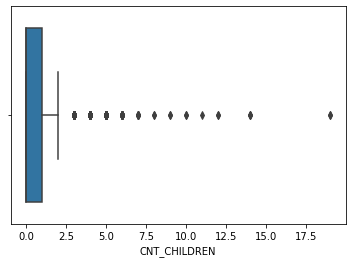

In [102]:
# for count of children column
sns.boxplot(client_appl['CNT_CHILDREN'])
# there are outliers in this column

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

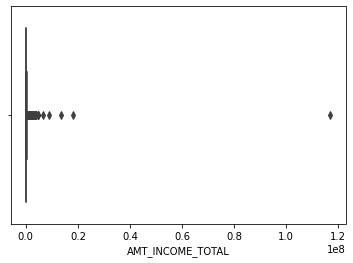

In [103]:
# for amount income total column
sns.boxplot(client_appl['AMT_INCOME_TOTAL'])
# there are outliers in this column

<AxesSubplot:xlabel='AMT_CREDIT'>

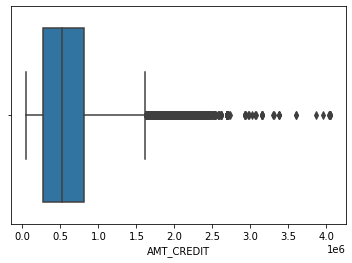

In [104]:
# for amount credit column
sns.boxplot(client_appl['AMT_CREDIT'])
# there are outliers in this column but some are continuos

<AxesSubplot:xlabel='AMT_ANNUITY'>

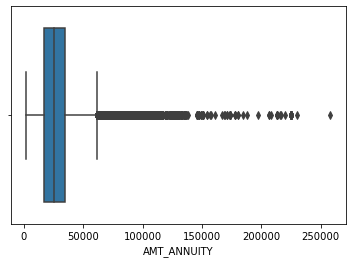

In [105]:
# for amount annuity column
sns.boxplot(client_appl['AMT_ANNUITY'])
# there are outliers in this column but more of them continuos

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

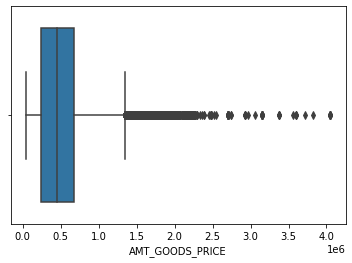

In [106]:
# for amount goods price column
sns.boxplot(client_appl['AMT_GOODS_PRICE'])
# more as same as amount annuity

<AxesSubplot:xlabel='DAYS_BIRTH'>

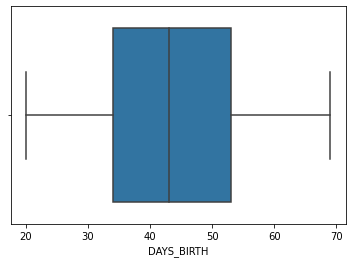

In [107]:
# for days birth column
sns.boxplot(client_appl['DAYS_BIRTH'])
# there are no outliers in this column

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

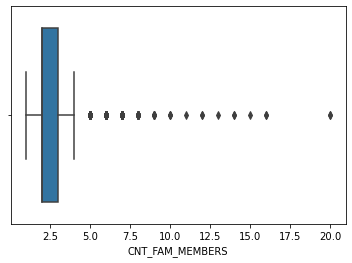

In [108]:
# for count of family memebers column
sns.boxplot(client_appl['CNT_FAM_MEMBERS'])
# there are outliers in this column just as count of children

**Check for data imbalance**
- As the analysis depends upon Target column
- It has values of 0 and 1 
- 0 means the client has no payment difficulties
- 1 means client has payment difficulty

In [109]:
client_appl["TARGET"].unique()

array([1, 0], dtype=int64)

In [110]:
# making the 2 variables with one is having values as 0 and other is having 1
appl_p0 = client_appl[client_appl["TARGET"]==0]
appl_p1 = client_appl[client_appl["TARGET"]==1]

In [111]:
Data_imbalance = appl_p0.shape[0]/appl_p1.shape[0]
Data_imbalance

11.387150050352467

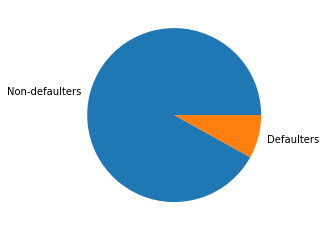

In [112]:
# plotting the pie chart for data imbalance
plt.pie([appl_p0.shape[0],appl_p1.shape[0]], labels=["Non-defaulters","Defaulters"])
plt.show()
# this is showing data is highly imbalance

**Univariate Analysis for Categorical columns**

In [113]:
# defining function for plotting the graph
def UA(var):
    A = appl_p1[var].value_counts()
    sns.barplot(x = A.index, y=A.values)
    plt.xticks(rotation=90)
    plt.title("Payment difficulties\n", fontdict={'fontsize':16,'color':'Blue'}  )
    plt.xlabel(var,fontdict={'fontsize':10,'color':'Magenta'})
    plt.ylabel('Count',fontdict={'fontsize':10,'color':'Magenta'})
    plt.show()

In [114]:
categ

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

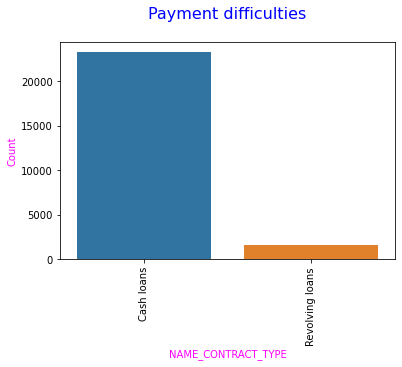

In [115]:
UA('NAME_CONTRACT_TYPE')
# applicants having cash loans are having high payment difficulties

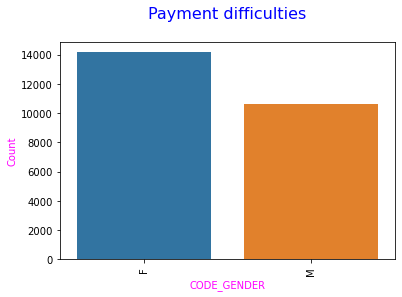

In [116]:
UA('CODE_GENDER')
# females are having more payment difficulty than men

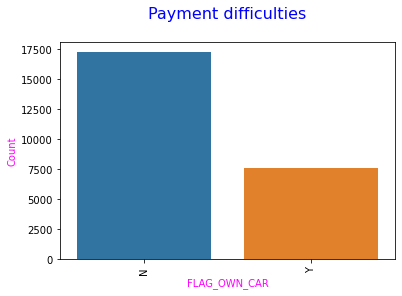

In [117]:
UA('FLAG_OWN_CAR')
# applicants having no car having more payment difficuty than having car

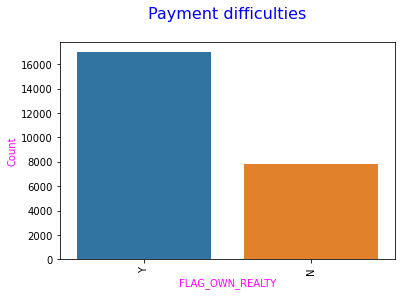

In [118]:
UA('FLAG_OWN_REALTY')
# applicants having house or flat having more payment difficulties 

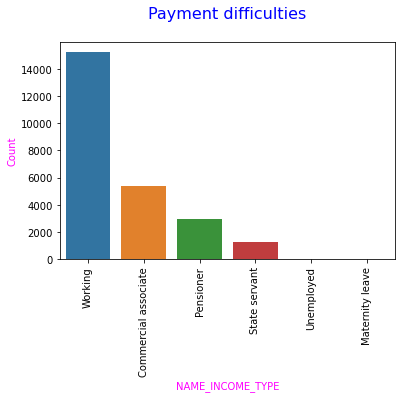

In [119]:
UA('NAME_INCOME_TYPE')
# applicants which are working are having more payment difficulty than others

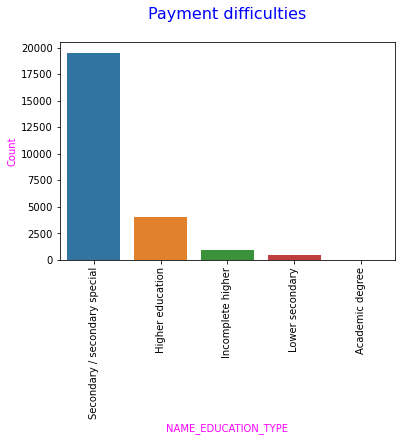

In [120]:
UA('NAME_EDUCATION_TYPE')
# applicants having secondary education are having more payment difficulties
# than other category

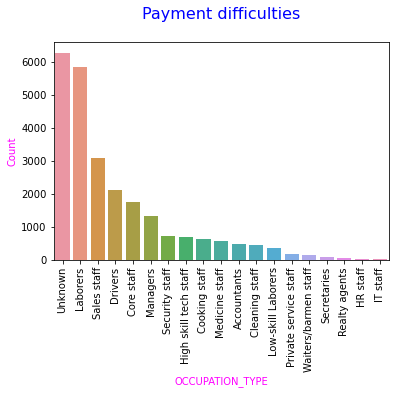

In [121]:
UA('OCCUPATION_TYPE')
# customers which are having occupation Unknown and laborers are having
# more payment difficulty than others

**Univariate Analysis for numerical columns**

In [122]:
# defining functions for plotting the graph
# UAH for histogram
def UAH(var):
    B = appl_p1[var]
    sns.histplot(B, kde=True)
    plt.title("Payment difficulties\n", fontdict={'fontsize':16,'color':'Blue'}  )
    plt.xlabel(var,fontdict={'fontsize':10,'color':'Magenta'})
    plt.show()  

In [123]:
numer

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

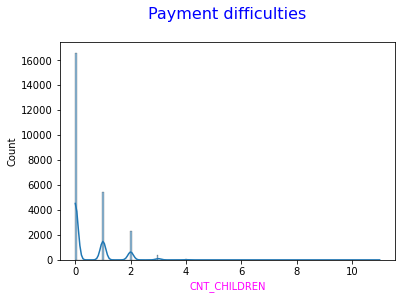

In [124]:
UAH("CNT_CHILDREN")
# customers hacing no children having more difficulties than having children

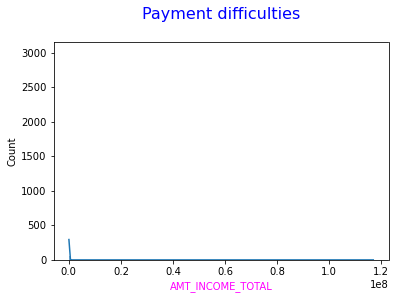

In [125]:
UAH("AMT_INCOME_TOTAL")
# customers having less income having more payment difficulties than having more income

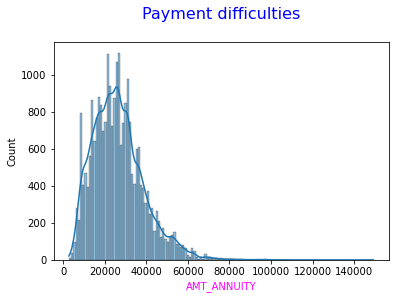

In [126]:
UAH("AMT_ANNUITY")
# as the rate of amount annuity increases upto 25000 payment difficulty
# incraeses after that it decreases

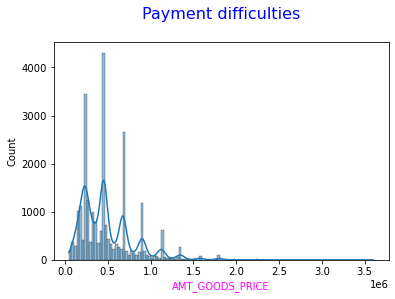

In [127]:
UAH("AMT_GOODS_PRICE")
# this plot showing mixed results in the upper dip of goods price payment
# difficulty is more

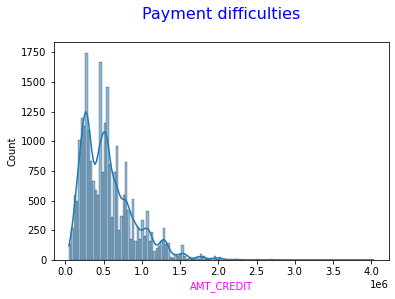

In [128]:
UAH("AMT_CREDIT")
# in the 20-50% of graph payment difficulty is high

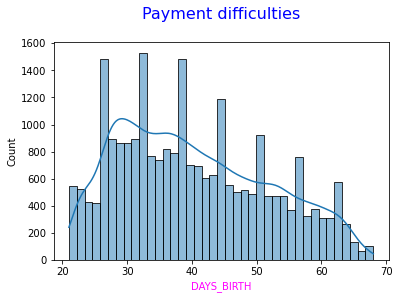

In [129]:
UAH("DAYS_BIRTH")
# graph is having mixed results

**Bivariate Aalysis**

**for categorical vs numerical**
- data is having outliers so taking median instead of mean
- using bar chart

<AxesSubplot:xlabel='CODE_GENDER'>

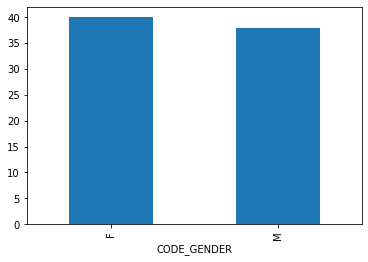

In [130]:
# for CODE_GENDER VS DAYS_BIRTH COLUMN
appl_p1.groupby("CODE_GENDER")["DAYS_BIRTH"].median().plot.bar()
# females having age more than 40 and men having age more than 37 having 
# more payment difficulties than other

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

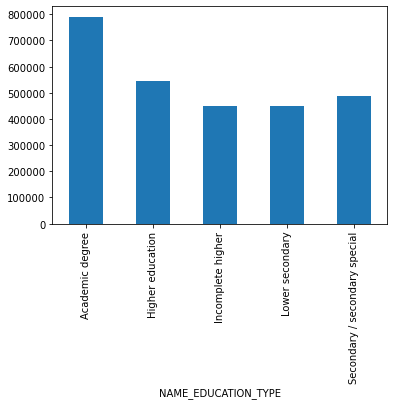

In [131]:
# for NAME_EDUCATION_TYPE vs AMT_CREDIT column
appl_p1.groupby("NAME_EDUCATION_TYPE")["AMT_CREDIT"].median().plot.bar()
# applicants having academic degree and having income more than 700000
# more payment difficulties than other type of educations

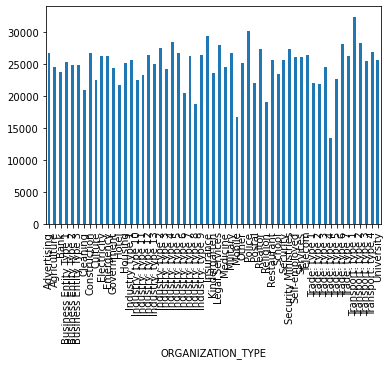

<Figure size 1080x432 with 0 Axes>

In [132]:
# for ORGANISATION_TYPE vs AMT_ANNUITY column
appl_p1.groupby("ORGANIZATION_TYPE")["AMT_ANNUITY"].median().plot.bar()
plt.figure(figsize=[15,6])
plt.show()
# showing mixed type results

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

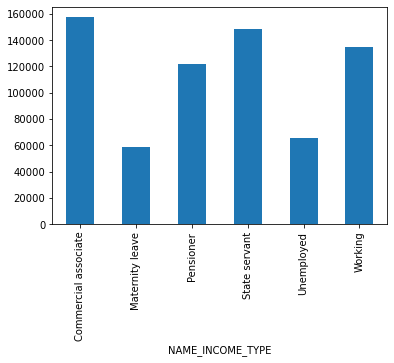

In [133]:
# for ORGANISATION_TYPE vs AMT_ANNUITY column
appl_p1.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].median().plot.bar()
# commercial associate and state servant having income more than 140000
# are having more payment difficulties and maternity leave and unemployed 
# having low income having less difficulties

**Numerical vs Numerical**
- using scatter plots

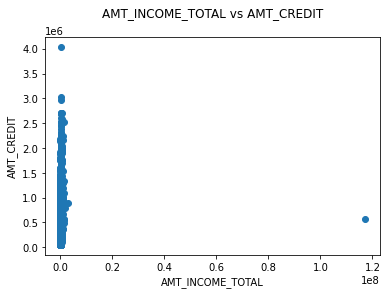

In [134]:
# for AMT_INCOME_TOTAL vs AMT_CREDIT column
plt.scatter(data = appl_p1, x="AMT_INCOME_TOTAL", y="AMT_CREDIT")
plt.title("AMT_INCOME_TOTAL vs AMT_CREDIT\n" )
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.show()
# the income total having outliers so all the applicants having income
# less than 200000 are facing payment issues and some of them having
# amount credit is high

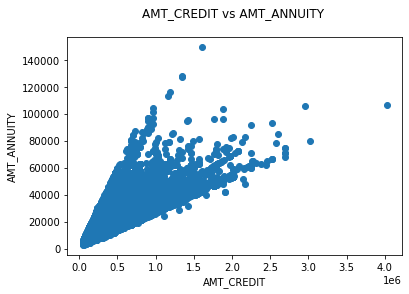

In [135]:
# for AMT_CREDIT vs AMT_ANNUITY column
plt.scatter(data = appl_p1, x="AMT_CREDIT", y="AMT_ANNUITY")
plt.title("AMT_CREDIT vs AMT_ANNUITY \n" )
plt.xlabel("AMT_CREDIT")
plt.ylabel("AMT_ANNUITY")
plt.show()
# all the applicants is scattered between amount annuity upto 80000 and 
# amount credit less than 20000

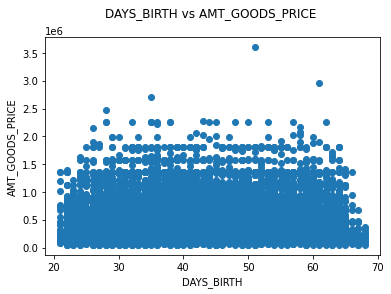

In [136]:
# for DAYS_BIRTH VS AMT_GOODS_PRICE
plt.scatter(data = appl_p1, x="DAYS_BIRTH", y="AMT_GOODS_PRICE")
plt.title("DAYS_BIRTH vs AMT_GOODS_PRICE \n" )
plt.xlabel("DAYS_BIRTH")
plt.ylabel("AMT_GOODS_PRICE")
plt.show()
# the maximum data of payment difficulties is spread between all ages
# they are given goods price to bank upto 200000

**Heatmap**

In [137]:
# all the important columns 
col =['CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE']

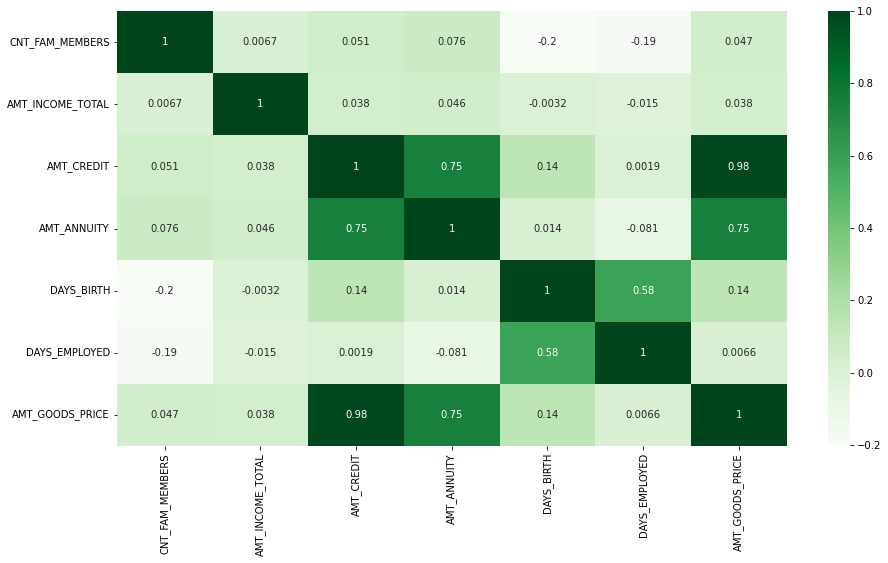

In [138]:
# plotting heatmap of correlation of the col values
plt.figure(figsize=[15,8])
sns.heatmap(appl_p1[col].corr(), cmap='Greens', annot=True)
plt.show()
# there is a high correlation between AMT_CREDIT & AMT_GOODS_PRICE,
# and also AMT_ANNUITY & AMT_GOODS_PRICE

### For previous_application

In [139]:
prev_loan.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
prev_loan.info() # 37 columns and 1670214 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Data Cleaning**

In [141]:
# % of null values
null_v = pd.DataFrame(100*prev_loan.isna().mean())

In [142]:
null_v.sort_values(0, ascending=False)

,0
RATE_INTEREST_PRIVILEGED,99.643698
RATE_INTEREST_PRIMARY,99.643698
AMT_DOWN_PAYMENT,53.636480
RATE_DOWN_PAYMENT,53.636480
NAME_TYPE_SUITE,49.119754
NFLAG_INSURED_ON_APPROVAL,40.298129
DAYS_TERMINATION,40.298129
DAYS_LAST_DUE,40.298129
DAYS_LAST_DUE_1ST_VERSION,40.298129
DAYS_FIRST_DUE,40.298129


In [143]:
# dropping the columns which have missing data more than 40%
null_v.head()

,0
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000


In [144]:
null_v.reset_index(inplace=True)

In [145]:
max_n = null_v[null_v[0]>40]["index"]

In [146]:
max_n1 = list(max_n)

In [147]:
max_n1

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [148]:
prev_loan.drop(max_n1, axis=1, inplace=True)

In [149]:
prev_loan.shape

(1670214, 26)

In [150]:
# remaining missing data treatment
null_v[(null_v[0]>0) & (null_v[0]<40)]

,index,0
3,AMT_ANNUITY,22.286665
5,AMT_CREDIT,0.000060
7,AMT_GOODS_PRICE,23.081773
28,CNT_PAYMENT,22.286366
30,PRODUCT_COMBINATION,0.020716


In [151]:
rem_n = null_v[(null_v[0]>0) & (null_v[0]<40)]

In [152]:
prev_loan[["AMT_ANNUITY","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT","PRODUCT_COMBINATION"]].head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT,PRODUCT_COMBINATION
0,1730.430,17145.0,17145.0,12.0,POS mobile with interest
1,25188.615,679671.0,607500.0,36.0,Cash X-Sell: low
2,15060.735,136444.5,112500.0,12.0,Cash X-Sell: high
3,47041.335,470790.0,450000.0,12.0,Cash X-Sell: middle
4,31924.395,404055.0,337500.0,24.0,Cash Street: high


In [153]:
# out of them 1 column is object and other ones are numerical
# filling the null values of object with mode 
# filling the null values of numerical column with median

In [154]:
prev_loan["AMT_ANNUITY"] = prev_loan["AMT_ANNUITY"].fillna(prev_loan["AMT_ANNUITY"].median()) 
prev_loan["AMT_CREDIT"] = prev_loan["AMT_CREDIT"].fillna(prev_loan["AMT_CREDIT"].median())  
prev_loan["AMT_GOODS_PRICE"] = prev_loan["AMT_GOODS_PRICE"].fillna(prev_loan["AMT_GOODS_PRICE"].median())  
prev_loan["CNT_PAYMENT"] = prev_loan["CNT_PAYMENT"].fillna(prev_loan["CNT_PAYMENT"].median()) 

In [155]:
prev_loan["PRODUCT_COMBINATION"] = prev_loan["PRODUCT_COMBINATION"].fillna(prev_loan["PRODUCT_COMBINATION"].mode()[0])

In [156]:
# all the missing data is imputed so for check
prev_loan.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [157]:
# making new variable for numerical and object columns
categ1 = []
numer1 = []
for i in prev_loan.columns:
    if prev_loan[i].dtype=='object':
        categ1.append(i)
    else:
        numer1.append(i)

**Univariate Analysis**

**For categorical column**

In [158]:
# defining function for plotting the graph
def UA1(var):
    A = prev_loan[var].value_counts()
    sns.barplot(x = A.index, y=A.values)
    plt.xticks(rotation=90)
    plt.xlabel(var,fontdict={'fontsize':10,'color':'Magenta'})
    plt.ylabel('Count',fontdict={'fontsize':10,'color':'Magenta'})
    plt.show()

In [159]:
categ1

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

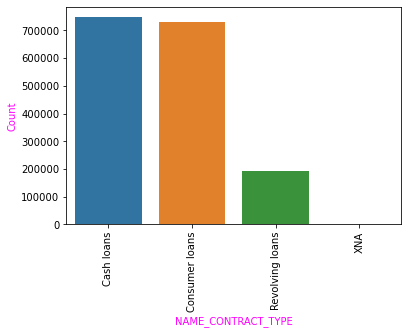

In [160]:
# for NAME_CONTRACT_TYPE column
UA1("NAME_CONTRACT_TYPE")
# maximum of applicants taken cash loans or consumer loan

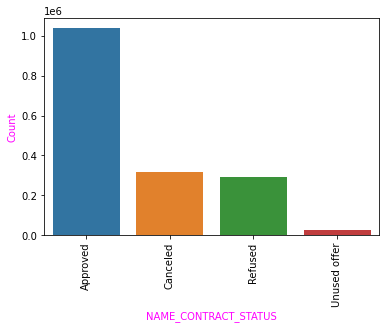

In [161]:
# for NAME_CONTRACT_STATUS column
UA1("NAME_CONTRACT_STATUS")
# maximum of applicants has their loan approved 

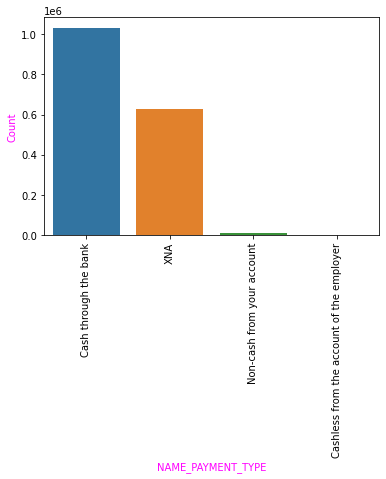

In [162]:
# for NAME_PAYMENT_TYPE column
UA1("NAME_PAYMENT_TYPE")
# maximum applicats taken their loan as cash through the bank

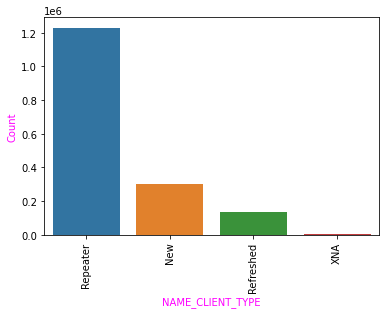

In [163]:
# for NAME_CLIENT_TYPE column
UA1("NAME_CLIENT_TYPE")
# the maximum applicats are repeaters

**For numerical column**

In [164]:
# defining functions for plotting the graph
# UAH for histogram
def UAH1(var):
    B = prev_loan[var]
    sns.histplot(B, kde=True)
    plt.xlabel(var,fontdict={'fontsize':10,'color':'Magenta'})
    plt.show() 

In [165]:
numer1

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

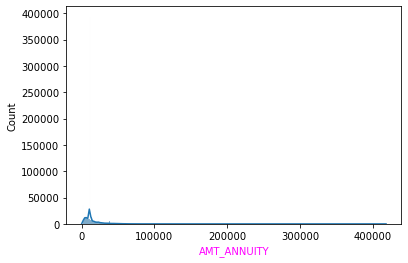

In [166]:
# for AMT_ANNUITY column
UAH1("AMT_ANNUITY")
# the maximum of amount annuity lies between 0 to 30000

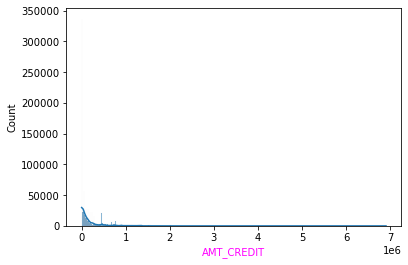

In [167]:
# for AMT_CREDIT column
UAH1("AMT_CREDIT")
# maximum data of amount credit lies between 0 to 100000

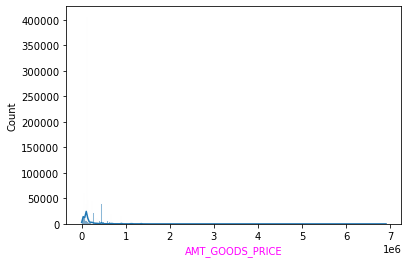

In [168]:
# for AMT_GOODS_PRICE column
UAH1("AMT_GOODS_PRICE")
# same as AMOUNT_CREDIT column

**Heatmap**

In [169]:
# columns for heat map
col1=['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT','AMT_APPLICATION','CNT_PAYMENT']

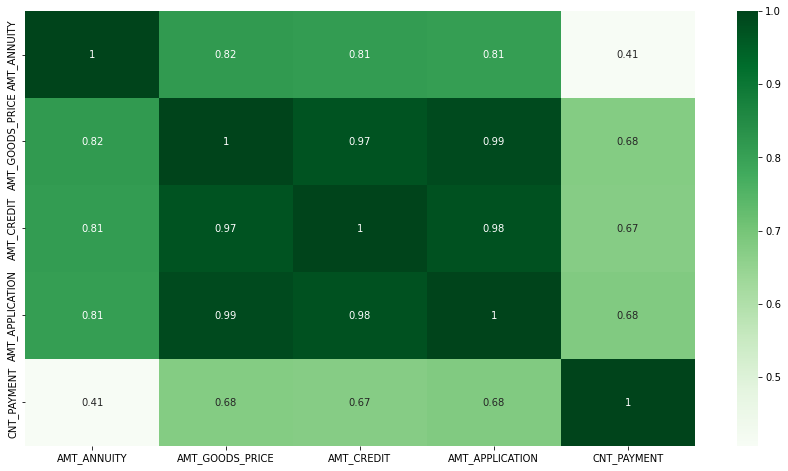

In [170]:
plt.figure(figsize=[15,8])
sns.heatmap(prev_loan[col1].corr(), cmap='Greens', annot=True)
plt.show()
# only AMT_ANNUITY and CNT_PAYMENT have low correlation 
# other columns are having high correlation

### Insights from the application_data

 **for target==1(having payment difficulty)**
- maximum applicants taken loan as cash loan and minimum have taken revolving loan.
- females are more than male
- applicants having no car having high payment difficulty than having a car.
- applicats having house or flat having high payment difficulty than no house/flat.
- applicants having which are working has high payment difficulty and which have academic degree are having no difficulty.
- applicants which are labour or unknown has high payment difficulty and which are IT staff are having very less difficulty. 
- maximum applicants having no children are having more payment difficulty than having children.

### Insights from previous_application data

- maximum of applicants taken cash loans or consumer loan and minimum applicants taken revolving loan.
- around 70% of applicants has their loan approved and 30% of applicants have their loan refused or canceled.
- maximum applicats taken their loan as cash through the bank and and very minimum have taken cashless.
- 80% applicants are repeaters and 20% are refreshed or new.
- maximum applicants taken credit less than 100000.
- maximum applicants taken annuity less than 30000. 